## Lead Scoring Case Study

### Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



Steps:
1. Data Preperation
2. EDA
2. Model Building
3. Model Refinement/Feature Selection
4. RoC Curve and Metrics
5. Prediction



In [1076]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
#Importing matplotlib
import matplotlib.pyplot as plt
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Data Preperation 

In [1077]:
# Reading the dataset
lead_data = pd.read_csv("Leads.csv")
lead_base_data = lead_data # Will be used for the file output 
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1078]:
# Dimensions 
lead_data.shape

(9240, 37)

In [1079]:
#Check the datatypes
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1080]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

In [1081]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1082]:
# List of binary variables to map
varlist =  ['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [1083]:
#Check the values in Lead Quality column before deciding what needs to be done
lead_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1084]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

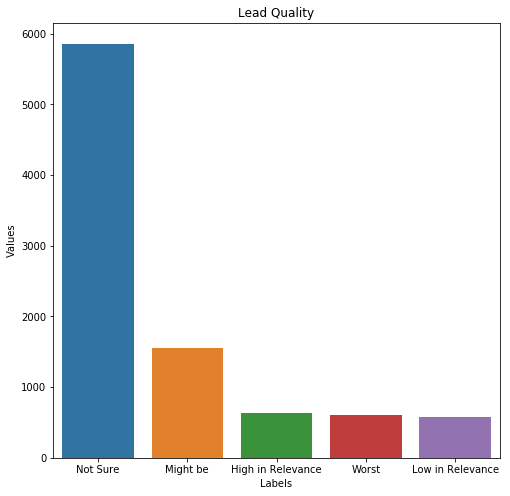

In [1085]:
import seaborn as sns

cnt = lead_data["Lead Quality"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })

plt.figure(figsize=(8,8))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("Lead Quality")
plt.show()

In [1086]:
#Considering that 'High in Relevance' is only 6% of the rows and rest all provide no additonal information,
#dropping this column  since 51% of the data is missing
#lead_data.drop(['Lead Quality'], axis = 1, inplace = True)

# Also dropping Asymmetrique columns since there is no good way to impute the data without introducing noise.
# As per the definition, this needs to have the index based on the user acitivy and hence we cannot impute it correctly
lead_data.drop(['Asymmetrique Activity Index'], axis = 1, inplace = True)
lead_data.drop(['Asymmetrique Activity Score'], axis = 1, inplace = True)
lead_data.drop(['Asymmetrique Profile Index'], axis = 1, inplace = True)
lead_data.drop(['Asymmetrique Profile Score'], axis = 1, inplace = True)

In [1087]:
#Check null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1088]:
lead_data["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

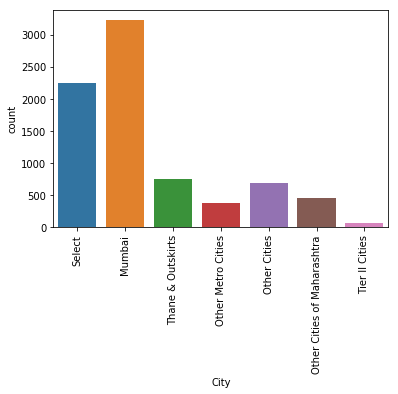

In [1089]:
sns.countplot(lead_data.City)
xticks(rotation = 90)

In [1090]:
#For city, imputing the null and the "Select" values with "Unknown"
lead_data.City.fillna('Unknown',inplace=True)
lead_data.loc[(lead_data['City'] == 'Select'),'City'] = 'Unknown'

In [1091]:
#Check the values in City/Country columns before deciding what needs to be done
cnt = lead_data["Country"].value_counts()
cnt_cntry_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })

cnt_cntry_df.head()

,Labels,Values
0,India,6492
1,United States,69
2,United Arab Emirates,53
3,Singapore,24
4,Saudi Arabia,21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

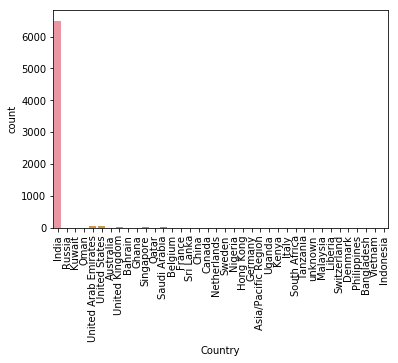

In [1092]:
sns.countplot(lead_data.Country)
xticks(rotation = 90)

In [1093]:
#Based on the above plot, Country column offers no variance(since majority is India). Hence dropping this column
lead_data.drop(['Country'], axis = 1, inplace = True)

In [1094]:
#Check null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1095]:
#Check the values in Lead profile column before deciding what needs to be done
cnt = lead_data["Lead Profile"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df

,Labels,Values
0,Select,4146
1,Potential Lead,1613
2,Other Leads,487
3,Student of SomeSchool,241
4,Lateral Student,24
5,Dual Specialization Student,20


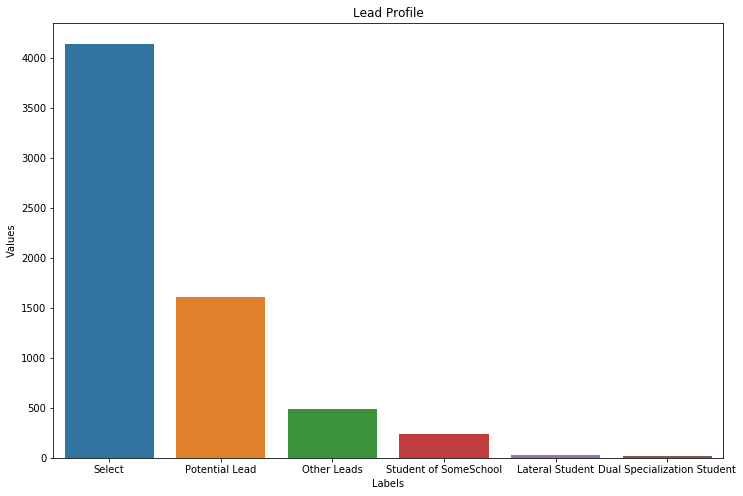

In [1096]:
plt.figure(figsize=(12,8))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("Lead Profile")
plt.show()

In [1097]:
#Based on the above, this column does not provide any useful information also it has too many Blank value, hence dropping
lead_data.drop(['Lead Profile'], axis = 1, inplace = True)

In [1098]:
#Check the values in Lead profile column before deciding what needs to be done
cnt = lead_data["Tags"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df

,Labels,Values
0,Will revert after reading the email,2072
1,Ringing,1203
2,Interested in other courses,513
3,Already a student,465
4,Closed by Horizzon,358
5,switched off,240
6,Busy,186
7,Lost to EINS,175
8,Not doing further education,145
9,Interested in full time MBA,117


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

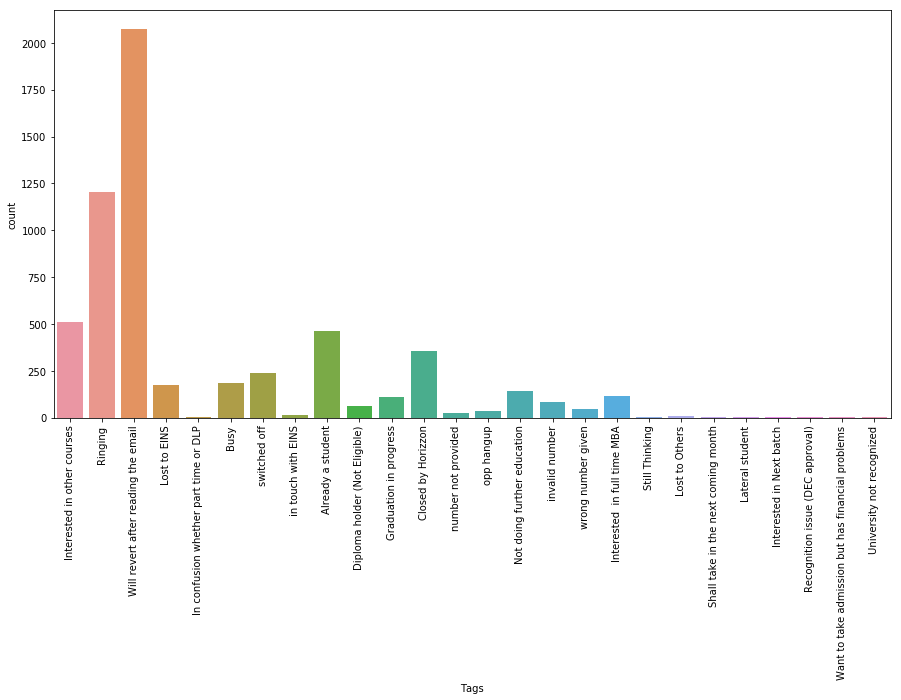

In [1099]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data.Tags)
xticks(rotation = 90)

In [1100]:
# Tag column can be imputed by 'No comments'.

lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'No comments')

In [1101]:
#Check null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1102]:
#Check the values in Specialization column before deciding what needs to be done
lead_data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

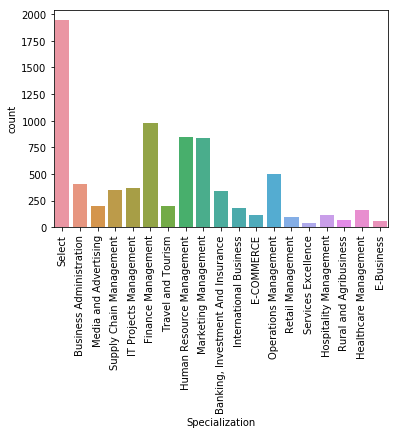

In [1103]:
sns.countplot(lead_data.Specialization)
xticks(rotation = 90)

In [1104]:
#For Specialization, imputing the null and the "Select" values with "Unknown"
lead_data.Specialization.fillna('Unknown',inplace=True)
lead_data.loc[(lead_data['Specialization'] == 'Select'),'Specialization'] = 'Unknown'

In [1105]:
#Check null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1106]:
#Fill the Total Visits and PageViewsPerVisit as the mean - since the missing values % is anyway not significant, this should be fine
lead_data.TotalVisits.fillna( lead_data.TotalVisits.mean(),inplace=True)
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mean(),inplace=True)

In [1107]:
#Check the values in source column before deciding what needs to be done
lead_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1108]:
# This column is either null/Select or has the same information as the other columns Search/Magazine etc.
# No additional info is provided by this column and hence being dropped
lead_data.drop(['How did you hear about X Education'], axis = 1, inplace = True)

In [1109]:
# Using another way to fill in the missing values with the most used value - mode()
lead_data['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [1110]:
# Using this for Current Occupation and What matters most
lead_data['What is your current occupation'].fillna('Unemployed',inplace=True)
lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [1111]:
#Check null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

#### Now it seems there are no missing values , now we can move to Data Exploration

# Exploratory Data Analysis

In [1112]:
# Calculation the ratio of successful converted (1) or not (0).

Converison = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converison

38.53896103896104

### Plotting independent variable against Target variable in chronological order

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

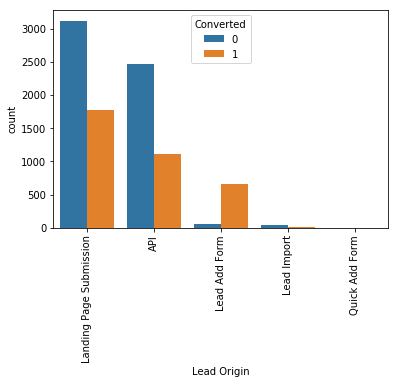

In [1113]:
#Lead Origin 
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data, order = lead_data['Lead Origin'].value_counts().index)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

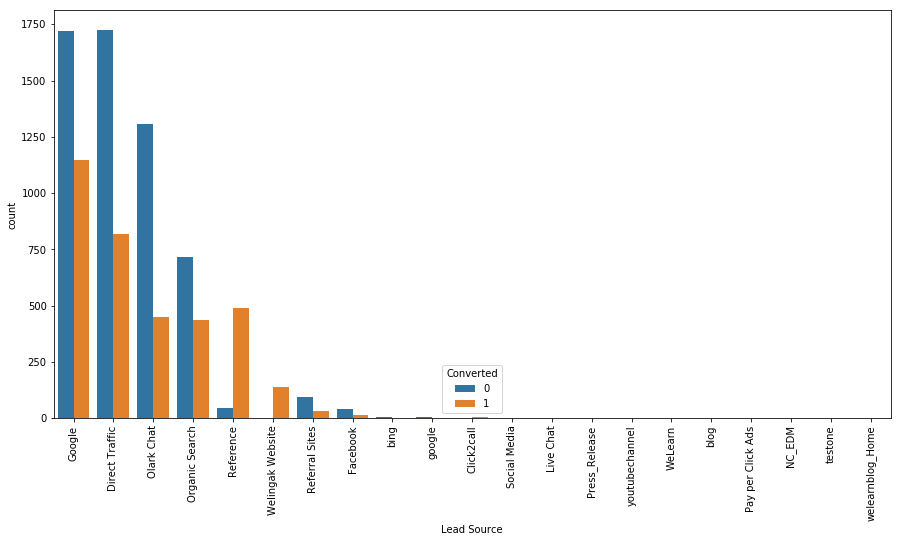

In [1114]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,order = lead_data['Lead Source'].value_counts().index)
xticks(rotation = 90)

Data can be transformed as seen in graph above. Google and google having 2 different column  and other lead source can be mapped to 'Misc_source'as it doesnt have much of data 

In [1115]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [1116]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Misc_source')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

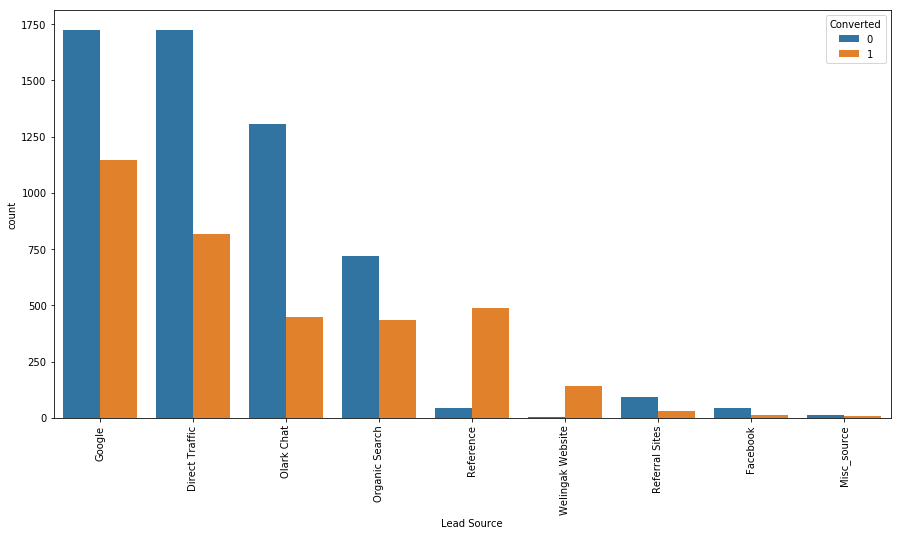

In [1117]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,order = lead_data['Lead Source'].value_counts().index)
xticks(rotation = 90)

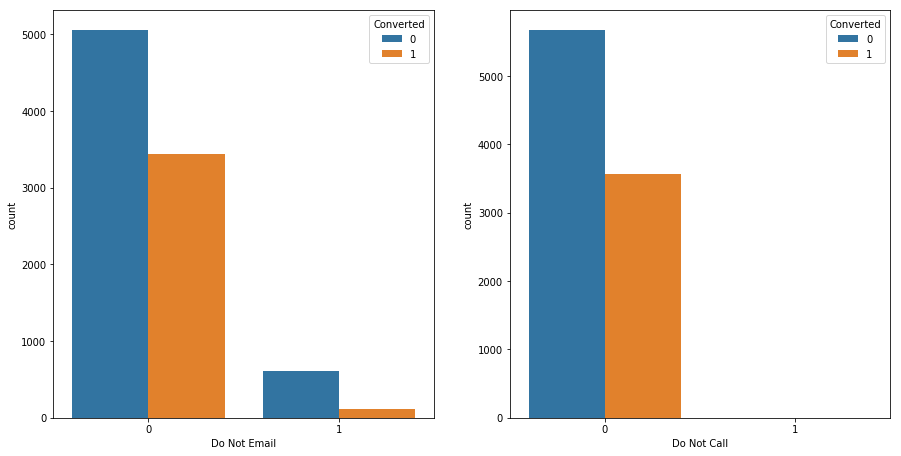

In [1118]:
## Do not Email and Do not Call 
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

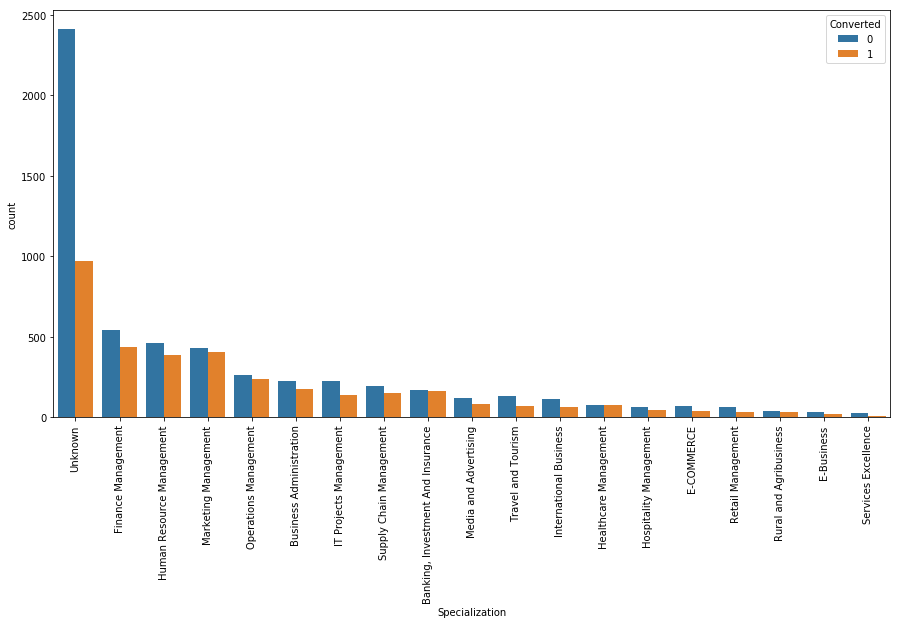

In [1119]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,order = lead_data['Specialization'].value_counts().index)
xticks(rotation = 90)

In [1120]:
# Get the value counts of all the columns
for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('#####################################')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
539eb309-df36-4a89-ac58-6d3651393910    1
5398e7ff-74db-4074-89fb-4fd9a603f521    1
53953744-234a-4cb9-9af4-bcc47eb472f4    1
539366d9-f633-455a-99e4-dbc5907db28e    1
5390c5fe-b12c-4f6e-ae92-908672abb0a1    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
53690d88-52f0-4ce5-b6b8-a13570a6db35    1
5363bd79-576c-48ed-83e4-024c81ea00c5    1
53c4e210-3344-4737-813f-74ef9a747ab6    1
53dbb914-71e7-458a-9749-cfb4d655eac2    1
53dd16bd-8201-448d-8e20-97de1cf44a7f    1
541325bd-15bb-4b52-8ad9-3fdf3cb1dd55    1
5434ccf3-9de6-4c72-8dd6-66c2829d0ee2    1
542a0891-2e52-40ba-ab42-e468b9636322    1
54238b21-65ce-4304-98c6-0f8a6b9671

As seen in EDA and looping for all remaining columns, its pretty evident that some of columns are not adding any value hence these can be dropped for next step

In [1121]:
lead_data.drop(['Prospect ID','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','A free copy of Mastering The Interview','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [1122]:
lead_data.shape

(9240, 16)

In [1123]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Not Sure,Unknown,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Dummy Variable creation for categorical columns

In [1124]:
temp = lead_data.loc[:, lead_data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [1125]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity']], drop_first=True)

lead_data = pd.concat([lead_data, dummy], axis=1)

In [1126]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Not Sure,Unknown,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0

In [1127]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],1)

In [1128]:
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0

## Checking for outlier

In [1129]:
temp_2 = lead_data.loc[:, lead_data.dtypes == 'int64']
temp_2.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'Total Time Spent on Website'],
      dtype='object')

In [1130]:
# Checking for outliers in the continuous variables
num_lead = lead_data[['Do Not Email', 'Do Not Call', 'Converted',
       'Total Time Spent on Website']]

In [1131]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268
std,0.270435,0.014711,0.486714,548.021466
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000
50%,0.000000,0.000000,0.000000,248.000000
75%,0.000000,0.000000,1.000000,936.000000
90%,0.000000,0.000000,1.000000,1380.000000
95%,1.000000,0.000000,1.000000,1562.000000
99%,1.000000,0.000000,1.000000,1840.610000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Test Train Split

In [1132]:
from sklearn.model_selection import train_test_split

In [1133]:
X = lead_data.drop(['Converted'], 1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1134]:
# Putting Converted variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1135]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [1136]:
from sklearn.preprocessing import StandardScaler

In [1137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,641410,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,0.099483,0.005716,-0.473232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,0.288795,1.365219,1.223999,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,

In [1138]:
# Checking the Lead Conversion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

In [1139]:
X_train_LN = X_train
X_train = X_train.drop(['Lead Number'], 1)
X_train_LN.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,641410,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,0.099483,0.005716,-0.473232,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,0.288795,-0.691418,0.067847,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,0.288795,1.365219,1.223999,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,

In [1140]:
X_test_LN = X_test
X_test = X_test.drop(['Lead Number'], 1)
X_test_LN.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,619003,0,0,8.0,1011,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,636884,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,590281,0,0,5.0,59,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,579892,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,617929,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

# Model Building

### Running your first model

In [1141]:
import statsmodels.api as sm

In [1142]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                          103
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        22:15:23   Pearson chi2:                 3.82e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -2.147e+14   2.94e+07  -7.31e+06      0.000   -2.15e+14   -2.15e+14
Do Not Email                                           -3.322e+14   4.46e+06  -7.45e+07      0.000   -3.32e+14   -3.32e+14
Do Not Call                                             3.576e+15   4.79e+07   7.47e+07      0.000    3.58e+15    3.58e+15
TotalVisits                                             6.344e+13   9.98e+05   6.36e+07      0.000    6.34e+13    6.34e+13
Total Time Spent on Website                             4.024e+14   1.02e+06   3.94e+08      0.000    4.02e+14    4.02e+14
Page Views Per Visit                                   -3.829e+13    1.2e+06  -3.19e+07      0.000   -3.83e+13   -3.83e+13
Lead Origin_Landing Page Submission                    -3.476e+14   3.79e+06  -9.17e+07      0.000   -3.48e+14   -3.48e+14
Lead Origin_Lead Add Form                               8.005e+14   1.24e+07   6.43e+07      0.000    8.01e+14    8.01e+14
Lead Origin_Lead Import                                 2.888e+15   4.89e+07   5.91e+07      0.000    2.89e+15    2.89e+15
Lead Origin_Quick Add Form                              4.184e+15    6.8e+07   6.15e+07      0.000    4.18e+15    4.18e+15
Lead Source_Facebook                                   -2.934e+15   4.88e+07  -6.01e+07      0.000   -2.93e+15   -2.93e+15
Lead Source_Google                                      1.118e+14   2.45e+06   4.56e+07      0.000    1.12e+14    1.12e+14
Lead Source_Misc_source                                -7.522e+13   1.64e+07  -4.59e+06      0.000   -7.52e+13   -7.52e+13
Lead Source_Olark Chat                                  5.797e+13   3.81e+06   1.52e+07      0.000     5.8e+13     5.8e+13
Lead Source_Organic Search                              9.598e+13   3.19e+06   3.01e+07      0.000     9.6e+13     9.6e+13
Lead Source_Reference                                  -5.947e+14   1.27e+07   -4.7e+07      0.000   -5.95e+14   -5.95e+14
Lead Source_Referral Sites                             -1.099e+14   7.55e+06  -1.46e+07      0.000    -1.1e+14    -1.1e+14
Lead Source_Welingak Website                           -1.597e+14    1.4e+07  -1.14e+07      0.000    -1.6e+14    -1.6e+14
Last Activity_Converted to Lead                         2.384e+14   9.58e+06   2.49e+07      0.000    2.38e+14    2.38e+14
Last Activity_Email Bounced                             2.822e+14   1.06e+07   2.65e+07      0.000    2.82e+14    2.82e+14
Last Activity_Email Link Clicked                        6.028e+13   1.19e+07   5.05e+06      0.000    6.03e+13    6.03e+13
Last Activity_Email Marked Spam                         1.809e+15   3.31e+07   5.47e+07      0.000    1.81e+15    1.81e+15
Last Activity_Email Opened                              4.773e+14   9.04e+06   5.28e+07

# Feature Selection using REF

In [1143]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1144]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1145]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False])

In [1146]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 18),
 ('Do Not Call', False, 53),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 78),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Misc_source', False, 41),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 88),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 32),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 63),
 ('Last Activity_Email Marked Spam', False, 90),
 ('Last Activity_Email Opened', False, 77),
 ('Last Activity_Email Received', False, 79),
 ('Last Activity_Form Submitted on Website

In [1147]:
col = X_train.columns[rfe.support_]

In [1148]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Misc_source',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last 

In [1149]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [1150]:
# Import statsmodels

import statsmodels.api as sm

In [1151]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1467.4
Date:                Mon, 26 Aug 2019   Deviance:                       2934.8
Time:                        22:15:27   Pearson chi2:                 1.66e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4571      0.072    -20.217      0.000      -1.598      -1.316
Lead Source_Welingak Website                      4.8848      0.753      6.484      0.000       3.408       6.361
Last Activity_SMS Sent                            2.1690      0.106     20.379      0.000       1.960       2.378
Tags_Busy                                         0.5582      0.221      2.527      0.012       0.125       0.991
Tags_Closed by Horizzon                           8.2388      1.008      8.170      0.000       6.262      10.215
Tags_Lateral student                             25.2898    7.3e+04      0.000      1.000   -1.43e+05    1.43e+05
Tags_Lost to EINS                                 7.2460      0.788      9.193      0.000       5.701       8.791
Tags_Ringing                                     -3.2335      0.222    -14.582      0.000      -3.668      -2.799
Tags_Will revert after reading the email          4.9783      0.175     28.504      0.000       4.636       5.321
Tags_invalid number                              -3.4909      1.029     -3.394      0.001      -5.507      -1.475
Tags_number not provided                        -23.7270   2.47e+04     -0.001      0.999   -4.84e+04    4.83e+04
Tags_switched off                                -3.6781      0.518     -7.097      0.000      -4.694      -2.662
Tags_wrong number given                         -23.8900   2.08e+04     -0.001      0.999   -4.08e+04    4.07e+04
Lead Quality_Worst                               -2.8710      0.551     -5.213      0.000      -3.951      -1.792
Last Notable Activity_Modified                   -1.8342      0.116    -15.878      0.000      -2.061      -1.608
Last Notable Activity_Olark Chat Conversation    -1.1453      0.396     -2.894      0.004      -1.921      -0.370
=================================================================================================================
"""

In [1152]:
X_train = X_train.drop('Tags_wrong number given',1)

In [1153]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1479.6
Date:                Mon, 26 Aug 2019   Deviance:                       2959.2
Time:                        22:15:27   Pearson chi2:                 1.61e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4740      0.072    -20.469      0.000      -1.615      -1.333
Lead Source_Welingak Website                      4.8948      0.752      6.505      0.000       3.420       6.370
Last Activity_SMS Sent                            2.1334      0.105     20.241      0.000       1.927       2.340
Tags_Busy                                         0.5934      0.220      2.699      0.007       0.163       1.024
Tags_Closed by Horizzon                           8.2393      1.008      8.171      0.000       6.263      10.216
Tags_Lateral student                             24.3247   4.43e+04      0.001      1.000   -8.68e+04    8.69e+04
Tags_Lost to EINS                                 7.2590      0.790      9.192      0.000       5.711       8.807
Tags_Ringing                                     -3.1875      0.221    -14.415      0.000      -3.621      -2.754
Tags_Will revert after reading the email          4.9870      0.174     28.613      0.000       4.645       5.329
Tags_invalid number                              -3.4444      1.028     -3.350      0.001      -5.460      -1.429
Tags_number not provided                        -22.6847    1.5e+04     -0.002      0.999   -2.94e+04    2.94e+04
Tags_switched off                                -3.6300      0.518     -7.009      0.000      -4.645      -2.615
Lead Quality_Worst                               -2.8985      0.550     -5.271      0.000      -3.976      -1.821
Last Notable Activity_Modified                   -1.8143      0.115    -15.763      0.000      -2.040      -1.589
Last Notable Activity_Olark Chat Conversation    -1.1290      0.396     -2.851      0.004      -1.905      -0.353
=================================================================================================================
"""

In [1154]:
X_train = X_train.drop('Tags_number not provided',1)

In [1155]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1486.7
Date:                Mon, 26 Aug 2019   Deviance:                       2973.4
Time:                        22:15:27   Pearson chi2:                 1.59e+04
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4854      0.072    -20.634      0.000      -1.626      -1.344
Lead Source_Welingak Website                      4.8999      0.752      6.517      0.000       3.426       6.374
Last Activity_SMS Sent                            2.1154      0.105     20.178      0.000       1.910       2.321
Tags_Busy                                         0.6134      0.219      2.797      0.005       0.184       1.043
Tags_Closed by Horizzon                           8.2383      1.008      8.171      0.000       6.262      10.215
Tags_Lateral student                             22.3411   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
Tags_Lost to EINS                                 7.2676      0.791      9.189      0.000       5.717       8.818
Tags_Ringing                                     -3.1615      0.221    -14.319      0.000      -3.594      -2.729
Tags_Will revert after reading the email          4.9918      0.174     28.682      0.000       4.651       5.333
Tags_invalid number                              -3.4180      1.028     -3.325      0.001      -5.433      -1.403
Tags_switched off                                -3.6029      0.518     -6.959      0.000      -4.618      -2.588
Lead Quality_Worst                               -2.9193      0.549     -5.315      0.000      -3.996      -1.843
Last Notable Activity_Modified                   -1.7996      0.115    -15.668      0.000      -2.025      -1.574
Last Notable Activity_Olark Chat Conversation    -1.1179      0.396     -2.822      0.005      -1.894      -0.342
=================================================================================================================
"""

In [1156]:
X_train = X_train.drop('Tags_Lateral student',1)

In [1157]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.0
Date:                Mon, 26 Aug 2019   Deviance:                       2980.0
Time:                        22:15:27   Pearson chi2:                 1.59e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4872      0.072    -20.657      0.000      -1.628      -1.346
Lead Source_Welingak Website                      4.8922      0.752      6.508      0.000       3.419       6.366
Last Activity_SMS Sent                            2.1268      0.105     20.313      0.000       1.922       2.332
Tags_Busy                                         0.6065      0.219      2.764      0.006       0.176       1.037
Tags_Closed by Horizzon                           8.2288      1.008      8.162      0.000       6.253      10.205
Tags_Lost to EINS                                 7.2595      0.791      9.178      0.000       5.709       8.810
Tags_Ringing                                     -3.1694      0.221    -14.353      0.000      -3.602      -2.737
Tags_Will revert after reading the email          4.9856      0.174     28.678      0.000       4.645       5.326
Tags_invalid number                              -3.4260      1.028     -3.332      0.001      -5.441      -1.411
Tags_switched off                                -3.6114      0.518     -6.975      0.000      -4.626      -2.597
Lead Quality_Worst                               -2.9220      0.549     -5.321      0.000      -3.998      -1.846
Last Notable Activity_Modified                   -1.7871      0.114    -15.630      0.000      -2.011      -1.563
Last Notable Activity_Olark Chat Conversation    -1.1155      0.396     -2.817      0.005      -1.892      -0.340
=================================================================================================================
"""

### Checking ViF

In [1158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
2,Tags_Busy,1.03
8,Tags_switched off,1.03
4,Tags_Lost to EINS,1.02
7,Tags_invalid number,1.01
11,Last Notable Activity_Olark Chat Conversation,1.00
9,Lead Quality_Worst,0.41
6,Tags_Will revert after reading the email,0.14
1,Last Activity_SMS Sent,0.11


# Model Evaluation

In [1160]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009097
6795    0.188907
3516    0.009097
8105    0.074353
3934    0.035869
4844    0.996632
3297    0.009097
8071    0.992949
987     0.035869
7423    0.996632
dtype: float64

In [1161]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00909744, 0.18890701, 0.00909744, 0.07435284, 0.03586858,
       0.99663224, 0.00909744, 0.9929487 , 0.03586858, 0.99663224])

In [1162]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred})
y_train_pred_final.head()

,Converted,Lead Score
0,0,0.009097
1,0,0.188907
2,0,0.009097
3,0,0.074353
4,0,0.035869


In [1163]:
y_train_pred_final['Predicted'] = y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,Predicted
0,0,0.009097,0
1,0,0.188907,0
2,0,0.009097,0
3,0,0.074353,0
4,0,0.035869,0


In [1164]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [1165]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3843  159]
 [ 328 2138]]


In [1166]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9247062461348176


In [1167]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1168]:
# Calculate the sensitivity

TP/(TP+FN)

0.8669910786699108

In [1169]:
# Calculate the specificity

TN/(TN+FP)

0.9602698650674663

In [1170]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Lead Score'], drop_intermediate = False )

In [1172]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

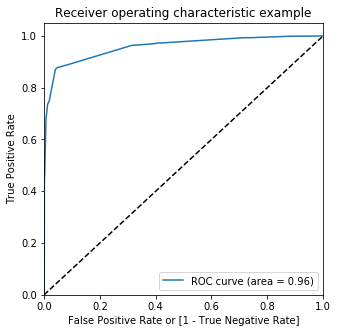

In [1173]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final['Lead Score'])

In [1174]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Lead Score'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009097,0,1,0,0,0,0,0,0,0,0,0
1,0,0.188907,0,1,1,0,0,0,0,0,0,0,0
2,0,0.009097,0,1,0,0,0,0,0,0,0,0,0
3,0,0.074353,0,1,0,0,0,0,0,0,0,0,0
4,0,0.035869,0,1,0,0,0,0,0,0,0,0,0


In [1175]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.791744  0.963504  0.685907
0.2   0.2  0.901361  0.891322  0.907546
0.3   0.3  0.925634  0.870641  0.959520
0.4   0.4  0.924706  0.866991  0.960270
0.5   0.5  0.924706  0.866991  0.960270
0.6   0.6  0.924706  0.866991  0.960270
0.7   0.7  0.893321  0.750608  0.981259
0.8   0.8  0.891311  0.734793  0.987756
0.9   0.9  0.872449  0.675994  0.993503


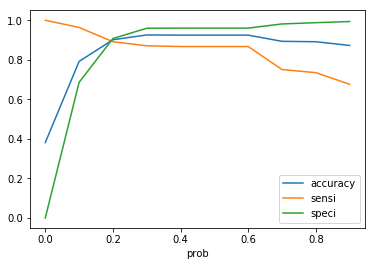

In [1176]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1177]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Lead Score'].map( lambda x: 1 if x > 0.20 else 0)

y_train_pred_final.head()

,Converted,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009097,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.188907,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.009097,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.074353,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.035869,0,1,0,0,0,0,0,0,0,0,0,0


In [1178]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9013605442176871

In [1179]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3632,  370],
       [ 268, 2198]], dtype=int64)

In [1180]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1181]:
# Calculate Sensitivity

TP/(TP+FN)

0.8913219789132197

In [1182]:
# Calculate Specificity

TN/(TN+FP)

0.9075462268865567

## Precision and recall tradeoff

##### Using sklearn utilities for the Precision and Recall

In [1183]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8559190031152648

In [1184]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8913219789132197

In [1185]:
from sklearn.metrics import precision_recall_curve

In [1186]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
        ..
 6418    0
 6419    0
 6420    0
 6421    0
 6422    0
 6423    0
 6424    0
 6425    1
 6426    0
 6427    0
 6428    0
 6429    1
 6430    0
 6431    0
 6432    0
 6433    0
 6434    0
 6435    1
 6436    0
 6437    0
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1

In [1187]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

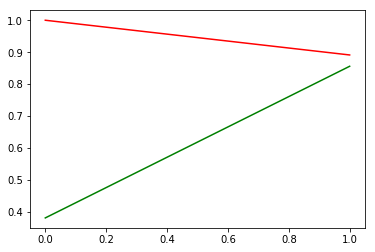

In [1188]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Prediction on test data

In [1189]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc_source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No comments,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,0.856729,0.964504,2.611381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,-0.657764,-0.885371,-1.088305,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.288795,-0.777416,1.223999,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,-0.657764,-0.885371,-1.088305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,-

In [1190]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7766,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1191]:
X_test_sm = sm.add_constant(X_test)

In [1192]:
# Check X_test_sm

X_test_sm

,const,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7766,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9199,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9186,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1631,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8963,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8007,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5324,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1193]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [1194]:
y_test_pred[:10]

4269    0.670804
2376    0.996632
7766    0.971284
9199    0.035869
4359    0.971284
9186    0.996632
1631    0.971284
8963    0.971284
8007    0.035869
5324    0.996632
dtype: float64

In [1195]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1196]:
# Let's see the head

y_pred_1.head()

,0
4269,0.670804
2376,0.996632
7766,0.971284
9199,0.035869
4359,0.971284


In [1197]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1198]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1199]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1200]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.670804
1,1,0.996632
2,1,0.971284
3,0,0.035869
4,1,0.971284


In [1201]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Lead Score'})

In [1202]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Lead Score
0,1,0.670804
1,1,0.996632
2,1,0.971284
3,0,0.035869
4,1,0.971284


In [1203]:
# Make predictions on the test set using 0.45 as the cutoff
y_pred_final['final_predicted'] = y_pred_final['Lead Score'].map(lambda x: 1 if x > 0.20 else 0)

In [1204]:
# Check y_pred_final
y_pred_final['Lead Score'] = round(y_pred_final['Lead Score']*100,2) 
y_pred_final.head()

,Converted,Lead Score,final_predicted
0,1,67.08,1
1,1,99.66,1
2,1,97.13,1
3,0,3.59,0
4,1,97.13,1


In [1205]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9040404040404041

In [1206]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1518,  159],
       [ 107,  988]], dtype=int64)

In [1207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1208]:
# Calculate sensitivity
TP / float(TP+FN)

0.902283105022831

In [1209]:
# Calculate specificity
TN / float(TN+FP)

0.9051878354203936

In [1210]:
y_pred_final

,Converted,Lead Score,final_predicted
0,1,67.08,1
1,1,99.66,1
2,1,97.13,1
3,0,3.59,0
4,1,97.13,1
5,1,99.66,1
6,1,97.13,1
7,1,97.13,1
8,0,3.59,0
9,1,99.66,1
